# Modelos Preditivos da Análise de Churn

### Contexto do Notebook

Este Notebook tem como foco aprimorar os modelos mais eficazes desenvolvidos anteriormente. Para alcançar esse objetivo, iniciaremos com uma cuidadosa seleção de atributos, identificando os mais relevantes para o desempenho do modelo. Em seguida, abordaremos o desbalanceamento de classes, aplicando técnicas adequadas para equilibrar a representação das classes minoritárias, o que é crucial para a precisão das previsões.

Com todas essas etapas concluídas, estaremos prontos para selecionar o modelo final, aquele que apresentará o melhor desempenho e estará pronto para ser implantado em ambiente de produção.

- ### Detalhes do Notebook

Neste notebook, irei realizar as seguintes etapas:

1. **Seleção de Atributos:** Identificar e selecionar os atributos mais relevantes para o desempenho do modelo.
2. **Tratamento do Desbalanceamento de Classes:** Aplicar técnicas adequadas para lidar com o desbalanceamento de classes, garantindo uma representação mais equilibrada das classes minoritárias.
3. **Seleção do Modelo Final:** Avaliar e selecionar o modelo que apresentar o melhor desempenho após a seleção de atributos e tratamento do desbalanceamento.

- ### Objetivos

1. Selecionar os atributos mais relevantes para o desempenho do modelo.
2. Aplicar técnicas para equilibrar o desbalanceamento de classes.
3. Selecionar o modelo final com o melhor desempenho.

- ### Resultados Esperados

Espera-se que, ao final deste Notebook, tenhamos um modelo final aprimorado, com alta precisão na previsão e pronto para ser implantado em ambiente de produção. O modelo deverá apresentar uma representação equilibrada das classes e utilizar os atributos mais relevantes para o desempenho, garantindo uma previsão precisa e eficaz.


## Importação das bibliotecas, base de dados e EDA

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [18]:
# Visualização e Manipulação dos Dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importação das métricas de avaliação de modelos
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
)


# Importação das métricas de avaliação de modelos
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
)

# Importação da base de dados
base = pd.read_csv('/content/Human_Resources.csv')


In [19]:
# Transformando dados categoricos binarios
base['Attrition'] = base['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
base['OverTime'] = base['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Excluindo as colunas que não irão influenciar na análise
base.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

# Importando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Criando o encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype='int32')

# Lista das colunas a serem transformadas
columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Iterando sobre as colunas e transformando-as
for col in columns_to_encode:
    ohe.fit(base[[col]])
    ohe_df = pd.DataFrame(ohe.transform(base[[col]]), columns=ohe.get_feature_names_out())
    base = pd.concat([base, ohe_df], axis=1)
    base.drop([col], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [20]:
# Separando previsores e a coluna alvo

#Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',
       'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',
       'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

#Coluna Alvo
y = base['Attrition']

#Normalizando os dados para que os algoritmos não considerem alguns atributos mais impotantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Separando em treino/teste:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size = 0.25, random_state=42)

### Otimização dos Modelos

Nos próximos passos do projeto, pretendo focar em otimizar os modelos de Regressão Logística e XGBoost para melhor identificar os casos de churn em nosso conjunto de dados.

Primeiramente, vou realizar uma análise mais detalhada dos atributos disponíveis, selecionando aqueles que são mais relevantes para a predição de churn. Isso ajudará a melhorar a eficiência dos modelos, reduzindo a dimensionalidade dos dados e eliminando atributos desnecessários.

Em seguida, devido ao desbalanceamento das classes em nosso conjunto de dados, onde a classe de churn representa apenas 16% dos casos, vou aplicar técnicas de balanceamento de classes. Isso pode incluir o aumento da classe minoritária (oversampling) ou a redução da classe majoritária (undersampling) para equilibrar a distribuição das classes e melhorar o desempenho dos modelos. Optei por não realizar o ajuste de hiperparâmetros para não aumentar a complexidade do projeto e somente o farei se o desempenho do modelo ainda não estiver atingindo patamares satisfatórios.

Por fim, salvarei o classificador com melhor desempenho.

Esses passos são cruciais para melhorar a capacidade dos modelos de prever casos de churn com maior precisão e recall, o que, por sua vez, contribuirá significativamente para a redução da taxa de churn na empresa.

#### Seleção de Atributos

In [21]:
# Importando o RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Selecionando as features e o target
X = base.drop('Attrition', axis=1)
y = base['Attrition']

# Dividindo os dados em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42)

# Criando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_treino, y_treino)

# Obtendo a importância das features
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Obtendo as 20 features mais importantes
top_features = feature_importances.head(20).index.tolist()

# Exibindo a lista de features mais importantes
print(top_features)

['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears', 'MonthlyRate', 'HourlyRate', 'DistanceFromHome', 'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsInCurrentRole', 'StockOptionLevel', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']


In [22]:
# Previsores
X_selecionado = base[['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears', 'MonthlyRate', 'HourlyRate', 'DistanceFromHome', 'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsInCurrentRole', 'StockOptionLevel', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']]

# Coluna Alvo
y_selecionado = base['Attrition']

#Normalizando os dados para que os algoritmos não considerem alguns atributos mais impotantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_selecionado = scaler.fit_transform(X_selecionado)

# Separando em treino/teste:
from sklearn.model_selection import train_test_split
X_treino_selecionado, X_teste_selecionado, y_treino_selecionado, y_teste_selecionado = train_test_split(X_selecionado, y_selecionado, test_size=0.25, random_state=1)



##### Regressão Logística

In [23]:
# Importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# Criando o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42)

# Treinando o modelo
log_reg.fit(X_treino_selecionado, y_treino_selecionado)

# Fazendo previsões
y_pred = log_reg.predict(X_teste_selecionado)

# Exibindo o relatório de classificação
print(classification_report(y_teste_selecionado, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       300
           1       0.85      0.25      0.39        68

    accuracy                           0.85       368
   macro avg       0.85      0.62      0.65       368
weighted avg       0.85      0.85      0.82       368



##### XGBoost

In [24]:
from xgboost import XGBClassifier

# Criando o modelo XGBoost
xgb = XGBClassifier(random_state=42)

# Treinando o modelo
xgb.fit(X_treino_selecionado, y_treino_selecionado)

# Fazendo previsões
y_pred = xgb.predict(X_teste_selecionado)

# Fazendo previsões
y_pred = xgb.predict(X_teste_selecionado)

# Exibindo o relatório de classificação
print(classification_report(y_teste_selecionado, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       300
           1       0.66      0.31      0.42        68

    accuracy                           0.84       368
   macro avg       0.76      0.64      0.66       368
weighted avg       0.82      0.84      0.82       368



Observa-se que a seleção de classes impactou negativamente o desempenho do modelo de regressão logística, possivelmente devido à redução do recall (Antes era de 0.4 e agora 0,31). Por outro lado, no XGBoost, houve uma manutenção no desempenho da métrica f1_score e também no recall. O diferencial está na acurácia final, na qual o XGBoost sem seleção (89%) supera o com seleção de features (84%). Portanto, mesmo com essa tentativa, optamos por manter os algoritmos iniciais, sem tratamento de atributos.

Ao decorrer dessa criação dos modelos preditivos, mesmo após a seleção cuidadosa de atributos e a aplicação de algoritmos específicos, observamos que o desempenho dos modelos em identificar o churn ainda não atingiu um nível satisfatório. Diante desse cenário, a próxima etapa do projeto consistirá em empregar técnicas de balanceamento artificial das classes, visando melhorar a performance dos modelos e aprimorar a identificação dos casos de churn.

#### Balanceamento de Classes


O balanceamento de classes é importante em modelos de machine learning porque ajuda a lidar com conjuntos de dados onde uma classe é significativamente menor em quantidade do que outra. Isso evita viés nos modelos, garantindo que eles aprendam padrões de todas as classes de forma equilibrada e não somente aprenda mais a classe mais dominante e acabe não acertando tanto a não dominante.

Usaremos duas técnicas de balanceamento de classes: **Undersampling** e **Oversampling**

- Undersampling (**NearMiss**): Esta técnica reduz a quantidade de instâncias da classe majoritária (classe 0) para equilibrar com a classe minoritária (classe 1). O algoritmo NearMiss seleciona instâncias da classe majoritária que são próximas das instâncias da classe minoritária, mantendo a representatividade dos dados. Isso reduz a predominância da classe majoritária, permitindo que o modelo aprenda de forma mais equilibrada a detectar o churn.

- Oversampling (**SMOTE**): Ao contrário do undersampling, o oversampling aumenta a quantidade de instâncias da classe minoritária. O SMOTE cria instâncias sintéticas da classe minoritária com base nas instâncias existentes, ampliando assim a representatividade dessa classe no conjunto de dados. Isso ajuda o modelo a aprender melhor os padrões da classe minoritária, melhorando sua capacidade de detectar o churn com precisão.


No entanto, é importante destacar que devemos considerar o método de balanceamento class_weight, o qual realiza um ajuste nos pesos das classes majoritária e minoritária sem a necessidade de remoção ou criação sintética de dados. Isso é particularmente preferível, pois métodos sintéticos podem, por vezes, resultar na perda de dados significativos ou introduzir ruídos nos dados existentes. Dado que este projeto é de estudo, caso não obtenhamos um desempenho satisfatório com o uso do método class_weight, planejamos recorrer às outras técnicas disponíveis, como oversampling e undersampling.

##### Usando 'class_weight'

In [25]:
# Criando uma instância do modelo de regressão logística com o parâmetro class_weight='balanced'
rl = LogisticRegression(class_weight='balanced', random_state=42)

# Separando previsores e a coluna alvo

# Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

# Coluna Alvo
y = base['Attrition']

# Normalizando os dados para que os algoritmos não considerem alguns atributos mais importantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Separando em treino/teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.25, random_state=42)

# Treinando o modelo
rl.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = rl.predict(X_teste)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_teste, y_pred))
print('-'*20)
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))


              precision    recall  f1-score   support

           0       0.93      0.78      0.85       320
           1       0.30      0.62      0.41        48

    accuracy                           0.76       368
   macro avg       0.62      0.70      0.63       368
weighted avg       0.85      0.76      0.79       368

--------------------
Predito    0    1  All
Real                  
0        250   70  320
1         18   30   48
All      268  100  368


Observa-se uma melhoria no recall e f1-score para a classe minoritária; no entanto, os resultados ainda não são satisfatórios. Desejo identificar pelo menos 70% dos casos de churn e, por isso, prosseguirei para usar os métodos de oversampling e undersampling.

##### Undersampling

###### Regressão Logística

In [26]:
# Separando previsores e a coluna alvo

# Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

# Coluna Alvo
y = base['Attrition']

# Normalizando os dados para que os algoritmos não considerem alguns atributos mais importantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Criando o modelo de Regressão Logística
rl = LogisticRegression(random_state=42)

# Usando NearMiss para balancear as classes
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_resample(X, y)

# Separando em treino/teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.25, random_state=42)

# Treinando o modelo
rl.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = rl.predict(X_teste)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_teste, y_pred))
print('-'*20)
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78        59
           1       0.78      0.78      0.78        60

    accuracy                           0.78       119
   macro avg       0.78      0.78      0.78       119
weighted avg       0.78      0.78      0.78       119

--------------------
Predito   0   1  All
Real                
0        46  13   59
1        13  47   60
All      59  60  119


Agora vamos verificar a possível existêcia de **Overfeating**.

**OBS:**
Verificar o overfitting em modelos de machine learning é essencial para garantir que o modelo generalize bem para novos dados e evite conclusões errôneas. Isso é importante para garantir a confiabilidade do modelo, seu desempenho em diferentes conjuntos de dados e sua utilidade na tomada de decisões.

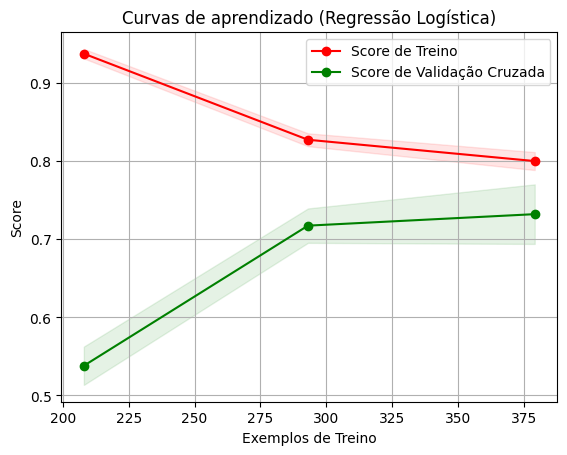

Métricas de desempenho nos dados de treino:
Accuracy: 0.7943661971830986
Precision: 0.7921348314606742
Recall: 0.7966101694915254
F1 Score: 0.7943661971830986

Métricas de desempenho nos dados de teste:
Accuracy: 0.7815126050420168
Precision: 0.7833333333333333
Recall: 0.7833333333333333
F1 Score: 0.7833333333333333


In [27]:
# Impotando 'learning_curve', usada para criar curvas de aprendizado em modelos de machine learning
from sklearn.model_selection import learning_curve

# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treino")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de Validação Cruzada")

    plt.legend(loc="best")
    return plt

# Calcula curvas de aprendizado
title = "Curvas de aprendizado (Regressão Logística)"
plot_learning_curve(rl, title, X, y, cv=5, n_jobs=-1)
plt.show()

# Calcula e imprime métricas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_pred = rl.predict(X_treino)
y_test_pred = rl.predict(X_teste)

print("Métricas de desempenho nos dados de treino:")
print("Accuracy:", accuracy_score(y_treino, y_train_pred))
print("Precision:", precision_score(y_treino, y_train_pred))
print("Recall:", recall_score(y_treino, y_train_pred))
print("F1 Score:", f1_score(y_treino, y_train_pred))

print("\nMétricas de desempenho nos dados de teste:")
print("Accuracy:", accuracy_score(y_teste, y_test_pred))
print("Precision:", precision_score(y_teste, y_test_pred))
print("Recall:", recall_score(y_teste, y_test_pred))
print("F1 Score:", f1_score(y_teste, y_test_pred))


Como o desempenho de treino e de teste estão semelhantes, **não há Overfeating**.

###### XGBoost

In [28]:
# Separando previsores e a coluna alvo

# Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

# Coluna Alvo
y = base['Attrition']

# Normalizando os dados para que os algoritmos não considerem alguns atributos mais importantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Criando o modelo XGBoost
xgb = XGBClassifier(random_state=42)

# Criando o NearMiss para balanceamento das classes
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_resample(X, y)

# Separando em treino/teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.25, random_state=42)

# Treinando o modelo
xgb.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = xgb.predict(X_teste)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_teste, y_pred))
print('-' * 20)
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))


              precision    recall  f1-score   support

           0       0.77      0.69      0.73        59
           1       0.73      0.80      0.76        60

    accuracy                           0.75       119
   macro avg       0.75      0.75      0.75       119
weighted avg       0.75      0.75      0.75       119

--------------------
Predito   0   1  All
Real                
0        41  18   59
1        12  48   60
All      53  66  119


Verifcando o Overfeating:

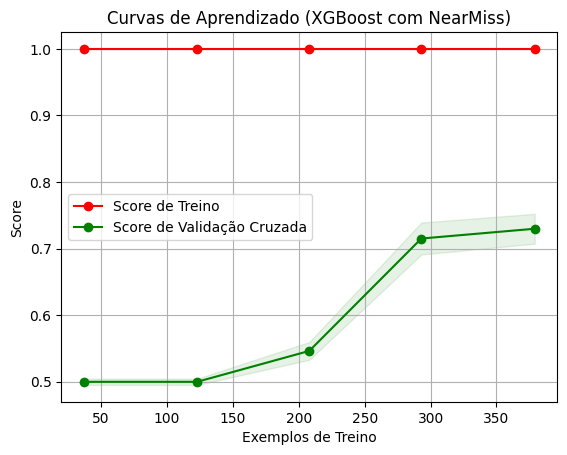

Métricas de desempenho nos dados de treino:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Métricas de desempenho nos dados de teste:
Accuracy: 0.7478991596638656
Precision: 0.7272727272727273
Recall: 0.8
F1 Score: 0.761904761904762


In [29]:
# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treino")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de Validação Cruzada")

    plt.legend(loc="best")
    return plt

# Calcula curvas de aprendizado
title = "Curvas de Aprendizado (XGBoost com NearMiss)"
plot_learning_curve(xgb, title, X, y, cv=5, n_jobs=-1)
plt.show()

# Calcula e imprime métricas de desempenho
y_train_pred = xgb.predict(X_treino)
y_test_pred = xgb.predict(X_teste)

print("Métricas de desempenho nos dados de treino:")
print("Accuracy:", accuracy_score(y_treino, y_train_pred))
print("Precision:", precision_score(y_treino, y_train_pred))
print("Recall:", recall_score(y_treino, y_train_pred))
print("F1 Score:", f1_score(y_treino, y_train_pred))

print("\nMétricas de desempenho nos dados de teste:")
print("Accuracy:", accuracy_score(y_teste, y_test_pred))
print("Precision:", precision_score(y_teste, y_test_pred))
print("Recall:", recall_score(y_teste, y_test_pred))
print("F1 Score:", f1_score(y_teste, y_test_pred))


Como há uma grande diferença entre as bases de treino e teste, é possível concluir que há **Overfeating**

##### Oversampling

###### Regressão Logística

In [30]:
# Separando previsores e a coluna alvo

# Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

# Coluna Alvo
y = base['Attrition']

# Normalizando os dados para que os algoritmos não considerem alguns atributos mais importantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Criando o modelo de Regressão Logística
rl = LogisticRegression(random_state=42)

# Criando o SMOTE para balanceamento das classes
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

# Separando em treino/teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.25, random_state=42)

# Treinando o modelo
rl.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = rl.predict(X_teste)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_teste, y_pred))
print('-' * 20)
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       311
           1       0.76      0.80      0.78       306

    accuracy                           0.77       617
   macro avg       0.77      0.77      0.77       617
weighted avg       0.77      0.77      0.77       617

--------------------
Predito    0    1  All
Real                  
0        233   78  311
1         62  244  306
All      295  322  617


Verificando o Overfeating:

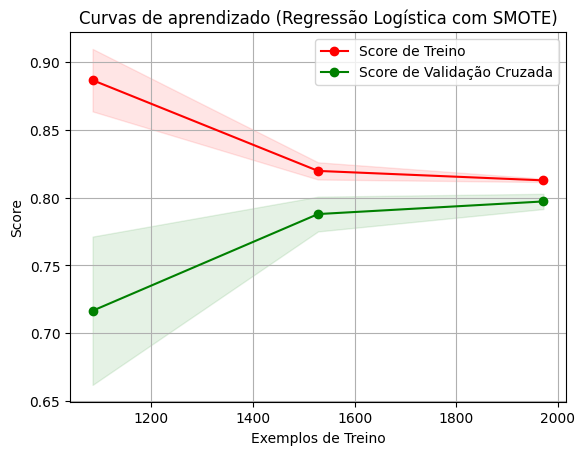

Métricas de desempenho nos dados de treino:
Accuracy: 0.8171984856679286
Precision: 0.8058151609553479
Recall: 0.837108953613808
F1 Score: 0.8211640211640212

Métricas de desempenho nos dados de teste:
Accuracy: 0.773095623987034
Precision: 0.7577639751552795
Recall: 0.7973856209150327
F1 Score: 0.7770700636942675


In [31]:
# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treino")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de Validação Cruzada")

    plt.legend(loc="best")
    return plt

# Calcula curvas de aprendizado
title = "Curvas de aprendizado (Regressão Logística com SMOTE)"
plot_learning_curve(rl, title, X, y, cv=5, n_jobs=-1)
plt.show()

# Calcula e imprime métricas de desempenho
y_train_pred = rl.predict(X_treino)
y_test_pred = rl.predict(X_teste)

print("Métricas de desempenho nos dados de treino:")
print("Accuracy:", accuracy_score(y_treino, y_train_pred))
print("Precision:", precision_score(y_treino, y_train_pred))
print("Recall:", recall_score(y_treino, y_train_pred))
print("F1 Score:", f1_score(y_treino, y_train_pred))

print("\nMétricas de desempenho nos dados de teste:")
print("Accuracy:", accuracy_score(y_teste, y_test_pred))
print("Precision:", precision_score(y_teste, y_test_pred))
print("Recall:", recall_score(y_teste, y_test_pred))
print("F1 Score:", f1_score(y_teste, y_test_pred))


Os desempenho nas bases de treino e teste estão semelhantes, portanto **não há Overfeating**.

###### XGBoost

In [32]:
# Separando previsores e a coluna alvo

# Previsores
X = base[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

# Coluna Alvo
y = base['Attrition']

# Normalizando os dados para que os algoritmos não considerem alguns atributos mais importantes que outros:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Criando o modelo XGBoost
xgb = XGBClassifier(random_state=42)

# Criando o SMOTE para balanceamento das classes
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 42)
X, y = smt.fit_resample(X, y)

# Separando em treino/teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.25, random_state=42)

# Treinando o modelo
xgb.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = xgb.predict(X_teste)

# Imprimindo o relatório de classificação e a matriz de confusão
print(classification_report(y_teste, y_pred))
print('-' * 20)
print(pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       311
           1       0.96      0.88      0.92       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617

--------------------
Predito    0    1  All
Real                  
0        299   12  311
1         37  269  306
All      336  281  617


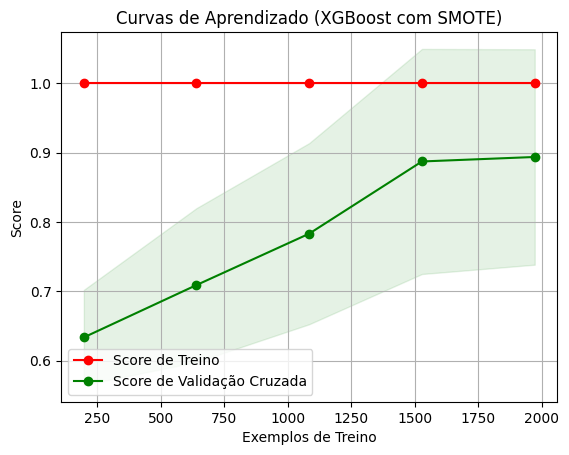

Métricas de desempenho nos dados de treino:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Métricas de desempenho nos dados de teste:
Accuracy: 0.9205834683954619
Precision: 0.9572953736654805
Recall: 0.8790849673202614
F1 Score: 0.9165247018739352


In [33]:
# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de Treino")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de Validação Cruzada")

    plt.legend(loc="best")
    return plt

# Calcula curvas de aprendizado
title = "Curvas de Aprendizado (XGBoost com SMOTE)"
plot_learning_curve(xgb, title, X, y, cv=5, n_jobs=-1)
plt.show()

# Calcula e imprime métricas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_pred = xgb.predict(X_treino)
y_test_pred = xgb.predict(X_teste)

print("Métricas de desempenho nos dados de treino:")
print("Accuracy:", accuracy_score(y_treino, y_train_pred))
print("Precision:", precision_score(y_treino, y_train_pred))
print("Recall:", recall_score(y_treino, y_train_pred))
print("F1 Score:", f1_score(y_treino, y_train_pred))

print("\nMétricas de desempenho nos dados de teste:")
print("Accuracy:", accuracy_score(y_teste, y_test_pred))
print("Precision:", precision_score(y_teste, y_test_pred))
print("Recall:", recall_score(y_teste, y_test_pred))
print("F1 Score:", f1_score(y_teste, y_test_pred))


Como há uma grande diferença entre as bases de treino e teste, é possível concluir que há **Overfeating**

Vamos criar um DataFrame para armazenar esses resultados

In [34]:
# Definir os dados do classification_report
data = {
    'recall_0': [0.78],
    'recall_1': [0.78],
    'f1_score_0': [0.78],
    'f1_score_1': [0.78],
    'overfitting': ['No']
}

# Criar o DataFrame
desempenho_modelos_balanceados = pd.DataFrame(data, index=['rl_under'])

# Atualizando o DataFrame de desempenho
data_xgb_under = {
    'recall_0': 0.69,
    'recall_1': 0.80,
    'f1_score_0': 0.73,
    'f1_score_1': 0.76,
    'overfitting': 'Yes'
}

desempenho_modelos_balanceados.loc['xgb_under'] = data_xgb_under

data_rl_over = {
    'recall_0': 0.75,
    'recall_1': 0.80,
    'f1_score_0': 0.77,
    'f1_score_1': 0.78,
    'overfitting': 'No'
}

desempenho_modelos_balanceados.loc['rl_over'] = data_rl_over

data_xgb_over = {
    'recall_0': 0.96,
    'recall_1': 0.88,
    'f1_score_0': 0.92,
    'f1_score_1': 0.92,
    'overfitting': 'Yes'
}

desempenho_modelos_balanceados.loc['xgb_over'] = data_xgb_over

# Exibir o DataFrame
print(desempenho_modelos_balanceados)


           recall_0  recall_1  f1_score_0  f1_score_1 overfitting
rl_under       0.78      0.78        0.78        0.78          No
xgb_under      0.69      0.80        0.73        0.76         Yes
rl_over        0.75      0.80        0.77        0.78          No
xgb_over       0.96      0.88        0.92        0.92         Yes


#### Relatório do Balanceamento



Relatório de Desempenho dos Modelos com Técnicas de Oversampling e Undersampling

Após aplicar as técnicas de oversampling e undersampling nos modelos de Regressão Logística (rl) e XGBoost (xgb) para lidar com o desbalanceamento de classes em minha análise de churn, obtive os seguintes resultados:

**rl_under:**

- Recall_0: 0.78
- Recall_1: 0.78
- F1 Score_0: 0.78
- F1 Score_1: 0.78
- Overfitting: Não

**xgb_under:**

- Recall_0: 0.69
- Recall_1: 0.80
- F1 Score_0: 0.73
- F1 Score_1: 0.76
- Overfitting: Sim

**rl_over:**

- Recall_0: 0.75
- Recall_1: 0.80
- F1 Score_0: 0.77
- F1 Score_1: 0.78
- Overfitting: Não

**xgb_over:**

- Recall_0: 0.96
- Recall_1: 0.88
- F1 Score_0: 0.92
- F1 Score_1: 0.92
- Overfitting: Sim

Após avaliar o desempenho dos modelos, escolhi o modelo de Regressão Logística com a técnica de oversampling (**rl_over**) devido ao fato de não apresentar overfitting e ter um desempenho superior na métrica recall_1, que é crucial para identificar os casos de churn e evitá-los. Este modelo equilibra bem a capacidade de generalização e o desempenho na classe de interesse.

Após essa etapa, o modelo alcançou níveis satisfatórios de desempenho, demonstrando sua capacidade de prever com precisão os casos de churn de funcionários. Na próxima etapa, irei salvar o classificador treinado e apresentar como sua implementação pode impactar positivamente a empresa. Ao aplicar o modelo aos dados em tempo real, a empresa poderá identificar os funcionários com maior probabilidade de deixar a organização e adotar medidas proativas para retê-los. Isso não apenas reduzirá os custos associados à rotatividade de funcionários, como também poderá melhorar a moral e a produtividade da equipe, resultando em benefícios financeiros significativos a longo prazo.



#### Salvando o Classificador

Irei salvar o classificador de Regressão Logística com Oversampling nesse [notebook](https://colab.research.google.com/drive/1S-_rbapsjpPYPGdhGEpMADXof8jchocU). Este modelo mostrou uma ótima capacidade de lidar com o desbalanceamento da base de dados e obteve resultados superiores na predição de churn de funcionários. Sua escolha se baseia em sua eficácia, generalização e interpretabilidade, aspectos cruciais para sua aplicação prática e entendimento pelos gestores. Espero que esse modelo contribua significativamente para a redução do churn e para o sucesso financeiro da empresa.